In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('listings_50_outliers_oslo.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10452 entries, 0 to 10451
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    10452 non-null  int64  
 1   last_scraped                                  10452 non-null  object 
 2   host_name                                     10452 non-null  object 
 3   host_since                                    10452 non-null  object 
 4   host_location                                 10452 non-null  object 
 5   host_response_time                            10452 non-null  object 
 6   host_response_rate                            10452 non-null  object 
 7   host_acceptance_rate                          10452 non-null  object 
 8   host_is_superhost                             10452 non-null  object 
 9   host_has_profile_pic                          10452 non-null 

In [34]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
 
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})


# Verificar la conversión
df[['host_response_rate', 'host_acceptance_rate']].head()

,host_response_rate,host_acceptance_rate
0,1.0,1.00
1,1.0,1.00
2,1.0,0.71
3,1.0,0.96
4,1.0,0.96


In [35]:
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

# Verificar la conversión
print(df['price'].unique())

[   0. 3400.  586. ...  874.  492.  738.]


In [36]:
print(df['review_scores_cleanliness'].unique())

[4.   4.98 4.78 4.58 4.72 5.   4.77 4.94 4.91 4.75 4.52 4.88 4.84 4.39
 4.38 4.62 4.97 4.71 4.8  4.44 4.33 4.86 4.2  4.9  4.83 4.29 4.64 4.93
 4.87 4.79 4.82 4.55 4.76 4.96 4.46 4.67 4.45 4.09 4.85 4.59 4.92 4.57
 4.95 4.36 4.68 4.31 4.73 3.73 4.74 4.61 4.43 4.5  4.1  4.89 4.4  4.81
 4.99 4.3  4.7  4.6  4.56 4.65 4.51 4.69 4.49 4.25 4.27 4.53 4.28 3.5
 4.54 3.67 4.37 4.22 4.42 4.66 4.34 4.48 3.76 4.41 3.   4.35 3.98 4.63
 3.75 4.24 4.26 4.17 3.4  4.07 4.15 3.89 3.71 4.08 3.33 3.97 4.13 4.47
 3.91 4.14 3.62 3.79 3.83 3.92 3.8  4.11 4.21 3.6  3.99 4.32 3.72 3.38
 4.23 3.88 3.93 3.9  4.04 3.58 3.82 4.18 4.06 3.78 4.16 3.86 4.19 3.31
 3.87 3.85 3.25 3.13 3.7  3.2 ]


In [42]:
df_encoded = pd.get_dummies(df, columns=['property_type', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'], drop_first=True)

# Verificar el resultado
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10452 entries, 0 to 10451
Data columns (total 100 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        10452 non-null  int64  
 1   last_scraped                                      10452 non-null  object 
 2   host_name                                         10452 non-null  object 
 3   host_since                                        10452 non-null  object 
 4   host_location                                     10452 non-null  object 
 5   host_response_time                                10452 non-null  object 
 6   host_response_rate                                10452 non-null  float64
 7   host_acceptance_rate                              10452 non-null  float64
 8   bathrooms_text                                    10452 non-null  object 
 9   price           

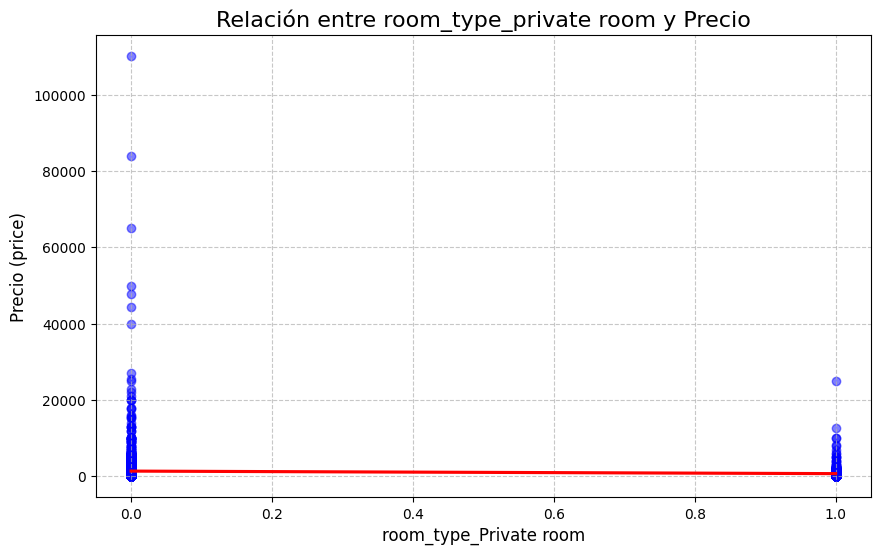

In [7]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [8]:
df_encoded

,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,bathrooms_text,price,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,1.0,1.00,2.5 baths,0.0,...,False,False,False,False,False,False,False,True,True,False
1,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,1.0,1.00,1 bath,3400.0,...,False,False,False,False,False,False,False,True,True,False
2,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,1.0,0.71,1 bath,586.0,...,False,False,False,False,True,False,False,True,True,False
3,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 bath,0.0,...,False,False,False,False,False,False,True,True,True,False
4,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 shared bath,0.0,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,10447,9/28/2024,Stian,9/12/2024,10,within a day,1.0,0.50,1 bath,810.0,...,False,False,False,False,False,False,False,True,False,True
10448,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,1.0,0.50,1 bath,738.0,...,False,False,False,False,False,False,False,True,True,False
10449,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,1.0,0.50,1 bath,900.0,...,False,False,False,False,False,False,False,False,True,False
10450,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,1.0,0.50,1 bath,800.0,...,False,False,False,False,False,False,False,True,False,False


In [9]:
X = df_encoded[['room_type_Private room']]  # Columnas codificadas de room_type
y = df_encoded['price']  # Variable dependiente

In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 759.34590009, 1405.49465753, 1405.49465753, ...,  759.34590009,
       1405.49465753, 1405.49465753])

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 3258875.572018517
Coeficiente de Determinación (R²): 0.01703044702811818


In [14]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print(coeficientes)

# Intercepto
print(f'Intercepto: {model.intercept_}')

                 Variable  Coeficiente
0  room_type_Private room  -646.148757
Intercepto: 1405.494657534246


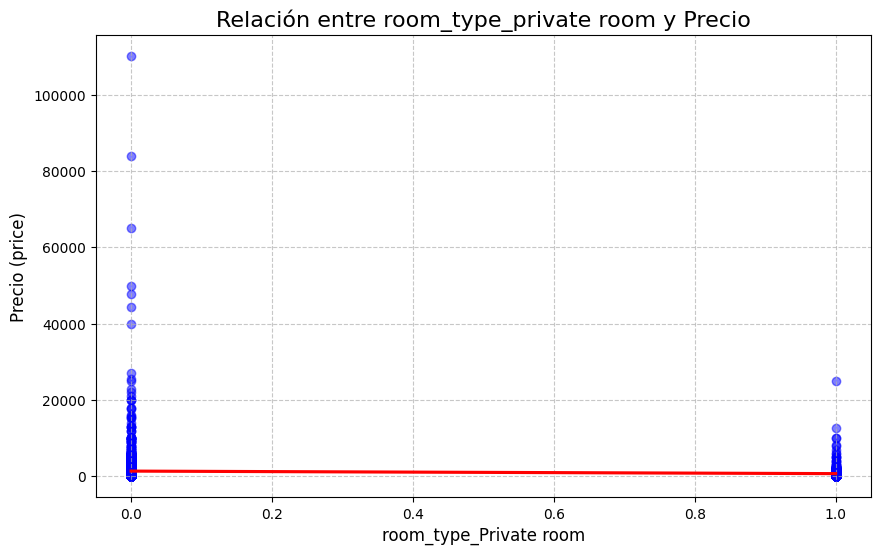

In [15]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

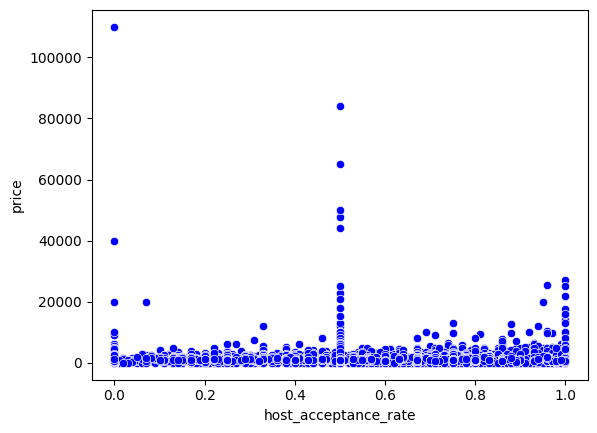

In [7]:
from turtle import color   
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)




In [8]:
Vars_Indep=df[['host_acceptance_rate']]
Vars_Dep=df['price']

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [10]:
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [12]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-222.7937501]),
 'rank_': 1,
 'singular_': array([32.78982352]),
 'intercept_': 1460.1623255711186}

In [13]:
y_pred1=model.predict(X=df_encoded[['host_acceptance_rate']])
y_pred1

array([1237.36857547, 1237.36857547, 1301.978763  , ..., 1348.76545052,
       1348.76545052, 1348.76545052])

In [14]:
df_encoded.insert(0,'y_pred1',y_pred1)
df_encoded

,y_pred1,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,bathrooms_text,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1237.368575,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,1.0,1.00,2.5 baths,...,False,False,False,False,False,False,False,True,True,False
1,1237.368575,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,1.0,1.00,1 bath,...,False,False,False,False,False,False,False,True,True,False
2,1301.978763,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,1.0,0.71,1 bath,...,False,False,False,False,True,False,False,True,True,False
3,1246.280325,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 bath,...,False,False,False,False,False,False,True,True,True,False
4,1246.280325,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,1 shared bath,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,1348.765451,10447,9/28/2024,Stian,9/12/2024,10,within a day,1.0,0.50,1 bath,...,False,False,False,False,False,False,False,True,False,True
10448,1348.765451,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,1.0,0.50,1 bath,...,False,False,False,False,False,False,False,True,True,False
10449,1348.765451,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,1.0,0.50,1 bath,...,False,False,False,False,False,False,False,False,True,False
10450,1348.765451,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,1.0,0.50,1 bath,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

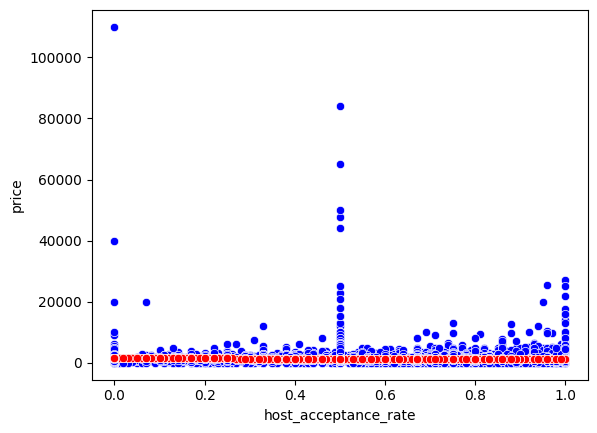

In [15]:

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_acceptance_rate',y='y_pred1',color='red',data=df_encoded)

<Axes: xlabel='host_is_superhost_1', ylabel='price'>

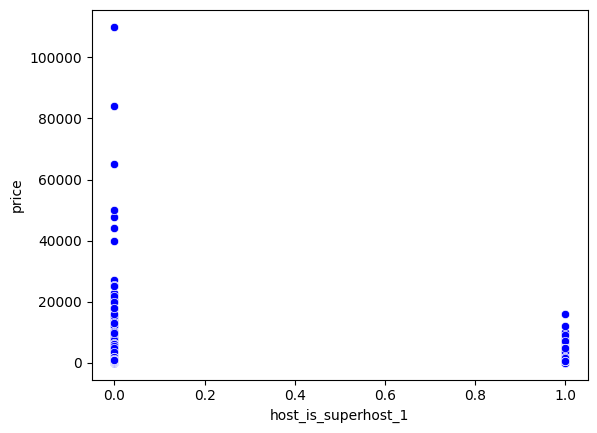

In [16]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)

In [17]:
Vars_Indep=df_encoded[['host_is_superhost_1']]
Vars_Dep=df['price']

In [18]:
model=LinearRegression()


In [19]:
type(model)

sklearn.linear_model._base.LinearRegression

In [20]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost_1'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-95.21247856]),
 'rank_': 1,
 'singular_': array([39.01987581]),
 'intercept_': 1334.6935596372932}

In [ ]:
y_pred2=model.predict(X=df_encoded[['host_is_superhost_1']])
y_pred2

array([1334.69355964, 1334.69355964, 1334.69355964, ..., 1334.69355964,
       1334.69355964, 1334.69355964])

In [ ]:
df_encoded.insert(0,'y_pred2',y_pred2)
df_encoded

,y_pred2,y_pred1,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1334.693560,1237.368575,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,1.0,1.00,...,False,False,False,False,False,False,False,True,True,False
1,1334.693560,1237.368575,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,1.0,1.00,...,False,False,False,False,False,False,False,True,True,False
2,1334.693560,1301.978763,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,1.0,0.71,...,False,False,False,False,True,False,False,True,True,False
3,1239.481081,1246.280325,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,...,False,False,False,False,False,False,True,True,True,False
4,1239.481081,1246.280325,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,0.96,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,1334.693560,1348.765451,10447,9/28/2024,Stian,9/12/2024,10,within a day,1.0,0.50,...,False,False,False,False,False,False,False,True,False,True
10448,1334.693560,1348.765451,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,1.0,0.50,...,False,False,False,False,False,False,False,True,True,False
10449,1334.693560,1348.765451,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,1.0,0.50,...,False,False,False,False,False,False,False,False,True,False
10450,1334.693560,1348.765451,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,1.0,0.50,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='host_is_superhost_1', ylabel='price'>

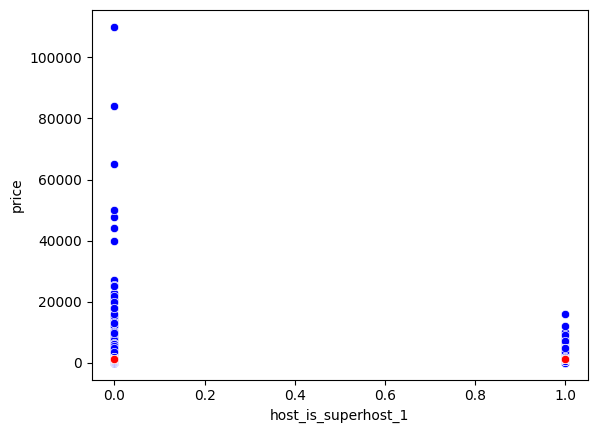

In [ ]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_is_superhost_1',y='y_pred2',color='red',data=df_encoded)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

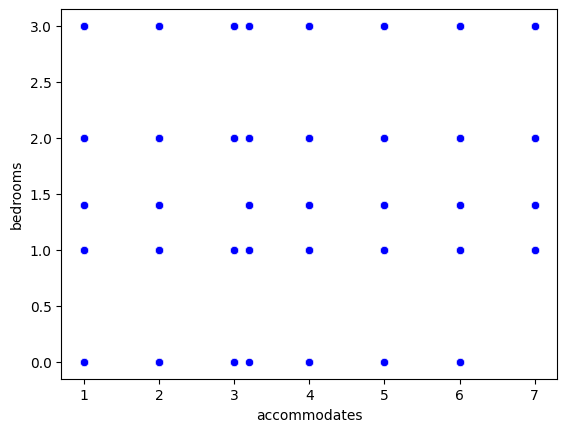

In [ ]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)

In [ ]:
Vars_Indep=df_encoded[['bedrooms']]
Vars_Dep=df_encoded['accommodates']

In [ ]:

from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.31114014]),
 'rank_': 1,
 'singular_': array([76.38486041]),
 'intercept_': 1.3379543396700804}

In [ ]:
y_pred3=model.predict(X=df_encoded[['bedrooms']])
y_pred3

array([5.27137474, 3.96023461, 2.64909447, ..., 2.64909447, 2.64909447,
       2.64909447])

In [ ]:
df_encoded.insert(0,'y_pred3',y_pred3)
df_encoded

,y_pred3,y_pred2,y_pred1,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,host_response_rate,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,5.271375,1334.693560,1237.368575,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,1.0,...,False,False,False,False,False,False,False,True,True,False
1,3.960235,1334.693560,1237.368575,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,1.0,...,False,False,False,False,False,False,False,True,True,False
2,2.649094,1334.693560,1301.978763,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,1.0,...,False,False,False,False,True,False,False,True,True,False
3,3.960235,1239.481081,1246.280325,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,...,False,False,False,False,False,False,True,True,True,False
4,1.337954,1239.481081,1246.280325,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,1.0,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,2.649094,1334.693560,1348.765451,10447,9/28/2024,Stian,9/12/2024,10,within a day,1.0,...,False,False,False,False,False,False,False,True,False,True
10448,2.649094,1334.693560,1348.765451,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,1.0,...,False,False,False,False,False,False,False,True,True,False
10449,2.649094,1334.693560,1348.765451,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,1.0,...,False,False,False,False,False,False,False,False,True,False
10450,2.649094,1334.693560,1348.765451,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,1.0,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='accommodates', ylabel='bedrooms'>

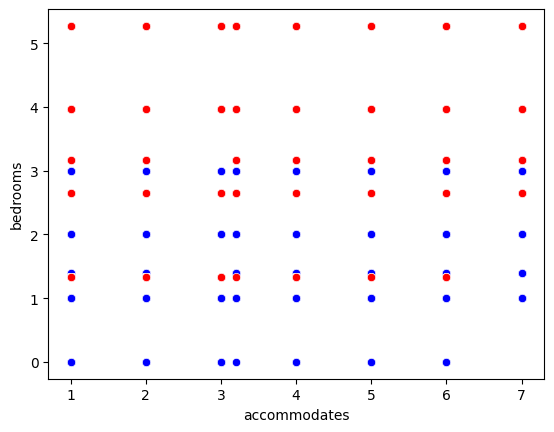

In [ ]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)
sns.scatterplot(x='accommodates',y='y_pred3',color='red',data=df_encoded)


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

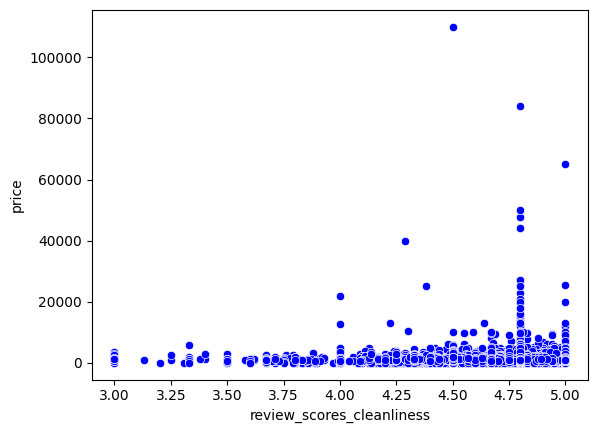

In [ ]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
#ns.scatterplot(x='speeding',y='price',color='red',data=df)

In [ ]:
Vars_Indep=df_encoded[['review_scores_cleanliness']]
Vars_Dep=df_encoded['price']

In [ ]:
model=LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([77.01002351]),
 'rank_': 1,
 'singular_': array([28.90429752]),
 'intercept_': 949.9614083653527}

In [ ]:
y_pred4=model.predict(X=df_encoded[['review_scores_cleanliness']])
y_pred4

array([1258.00150242, 1333.47132547, 1318.06932076, ..., 1319.60952123,
       1319.60952123, 1319.60952123])

In [ ]:
df_encoded.insert(0,'y_pred4',y_pred4)
df_encoded

,y_pred4,y_pred3,y_pred2,y_pred1,Unnamed: 0,last_scraped,host_name,host_since,host_location,host_response_time,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1258.001502,5.271375,1334.693560,1237.368575,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",within a day,...,False,False,False,False,False,False,False,True,True,False
1,1333.471325,3.960235,1334.693560,1237.368575,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",within an hour,...,False,False,False,False,False,False,False,True,True,False
2,1318.069321,2.649094,1334.693560,1301.978763,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",within a day,...,False,False,False,False,True,False,False,True,True,False
3,1302.667316,3.960235,1239.481081,1246.280325,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,...,False,False,False,False,False,False,True,True,True,False
4,1313.448719,1.337954,1239.481081,1246.280325,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",within an hour,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,1319.609521,2.649094,1334.693560,1348.765451,10447,9/28/2024,Stian,9/12/2024,10,within a day,...,False,False,False,False,False,False,False,True,False,True
10448,1319.609521,2.649094,1334.693560,1348.765451,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",within a day,...,False,False,False,False,False,False,False,True,True,False
10449,1319.609521,2.649094,1334.693560,1348.765451,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,within a day,...,False,False,False,False,False,False,False,False,True,False
10450,1319.609521,2.649094,1334.693560,1348.765451,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",within a day,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

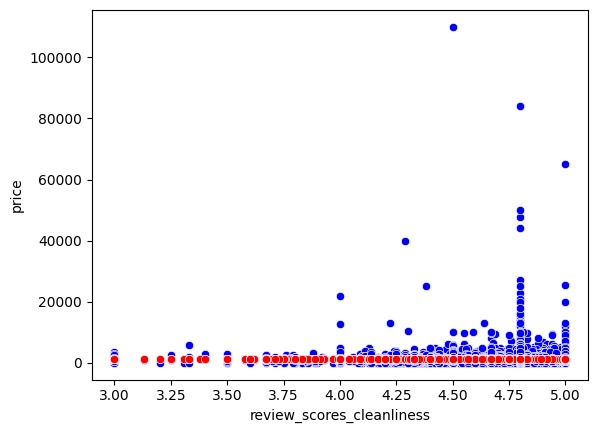

In [ ]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='review_scores_cleanliness',y='y_pred4',color='red',data=df_encoded)

<Axes: xlabel='host_identity_verified_t', ylabel='price'>

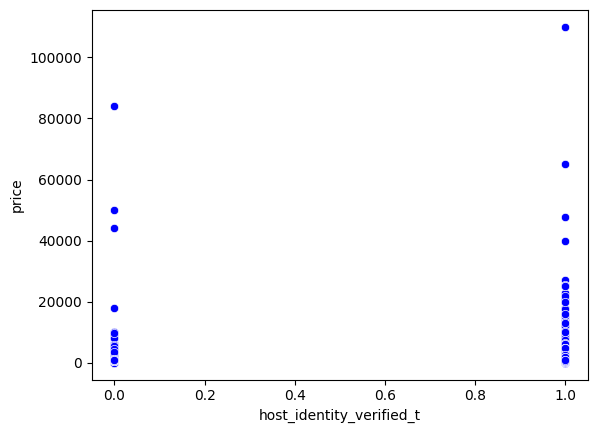

In [ ]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)

In [ ]:
Vars_Indep=df_encoded[['host_identity_verified_t']]
Vars_Dep=df_encoded['price']

In [ ]:
model=LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([35.4450386]),
 'rank_': 1,
 'singular_': array([41.18167026]),
 'intercept_': 1289.6192488262914}

In [ ]:
y_pred5=model.predict(X=df_encoded[['host_identity_verified_t']])
y_pred5

array([1325.06428743, 1325.06428743, 1325.06428743, ..., 1325.06428743,
       1289.61924883, 1289.61924883])

In [ ]:
#df_encoded.insert(0,'y_pred5',y_pred5)
df_encoded

,y_pred5,y_pred4,y_pred3,y_pred2,y_pred1,Unnamed: 0,last_scraped,host_name,host_since,host_location,...,property_type_Tent,property_type_Tiny home,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1325.064287,1258.001502,5.271375,1334.693560,1237.368575,0,9/28/2024,Lars Kristian,7/19/2014,"Oslo, Norway",...,False,False,False,False,False,False,False,True,True,False
1,1325.064287,1333.471325,3.960235,1334.693560,1237.368575,1,9/28/2024,Cecilie,8/1/2010,"Oslo, Norway",...,False,False,False,False,False,False,False,True,True,False
2,1325.064287,1318.069321,2.649094,1334.693560,1301.978763,2,9/28/2024,Reidun,1/30/2011,"Oslo, Norway",...,False,False,False,False,True,False,False,True,True,False
3,1325.064287,1302.667316,3.960235,1239.481081,1246.280325,3,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",...,False,False,False,False,False,False,True,True,True,False
4,1325.064287,1313.448719,1.337954,1239.481081,1246.280325,4,9/28/2024,Melissa,10/1/2010,"Oslo, Norway",...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,1289.619249,1319.609521,2.649094,1334.693560,1348.765451,10447,9/28/2024,Stian,9/12/2024,10,...,False,False,False,False,False,False,False,True,False,True
10448,1325.064287,1319.609521,2.649094,1334.693560,1348.765451,10448,9/28/2024,Johan,10/9/2014,"Oslo, Norway",...,False,False,False,False,False,False,False,True,True,False
10449,1325.064287,1319.609521,2.649094,1334.693560,1348.765451,10449,9/28/2024,Jonas Kristoffer,9/26/2024,10,...,False,False,False,False,False,False,False,False,True,False
10450,1289.619249,1319.609521,2.649094,1334.693560,1348.765451,10450,9/28/2024,Lina Hovden,6/24/2015,"Oslo, Norway",...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='host_identity_verified_t', ylabel='y_pred5'>

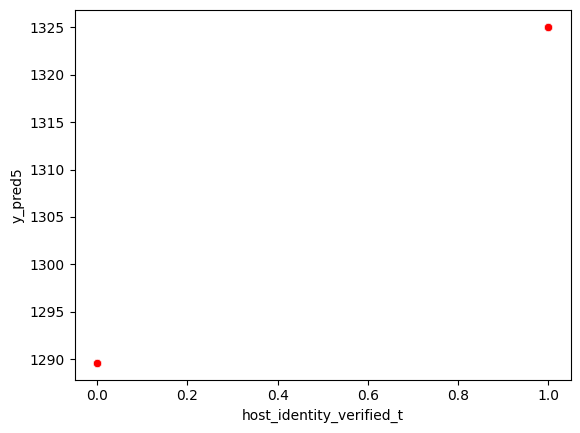

In [ ]:
#sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_identity_verified_t',y='y_pred5',color='red',data=df_encoded)

In [ ]:
sns.scatterplot(x='alcohol', y='total', color="blue", data=df_encoded)
sns.scatterplot(x='speeding', y='total', color="red", data=df_encoded)
sns.scatterplot(x='no_previous', y='total', color="yellow", data=df_encoded)

In [43]:
df_2=df_encoded[['host_id', 'host_acceptance_rate', 'host_is_superhost_1', 'host_total_listings_count' 
         , 'accommodates', 'bedrooms', 'price',  'reviews_per_month']]
df_2.head()


,host_id,host_acceptance_rate,host_is_superhost_1,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,18365661,1.00,False,2.0,6.0,3.0,0.0,0.53
1,187463,1.00,False,2.0,3.0,2.0,3400.0,0.40
2,368229,0.71,False,1.0,2.0,1.0,586.0,0.34
3,250159,0.96,True,3.0,4.0,2.0,0.0,0.50
4,250159,0.96,True,3.0,2.0,0.0,0.0,1.46


In [44]:
print(df_2.isnull().sum())

host_id                      0
host_acceptance_rate         0
host_is_superhost_1          0
host_total_listings_count    0
accommodates                 0
bedrooms                     0
price                        0
reviews_per_month            0
dtype: int64


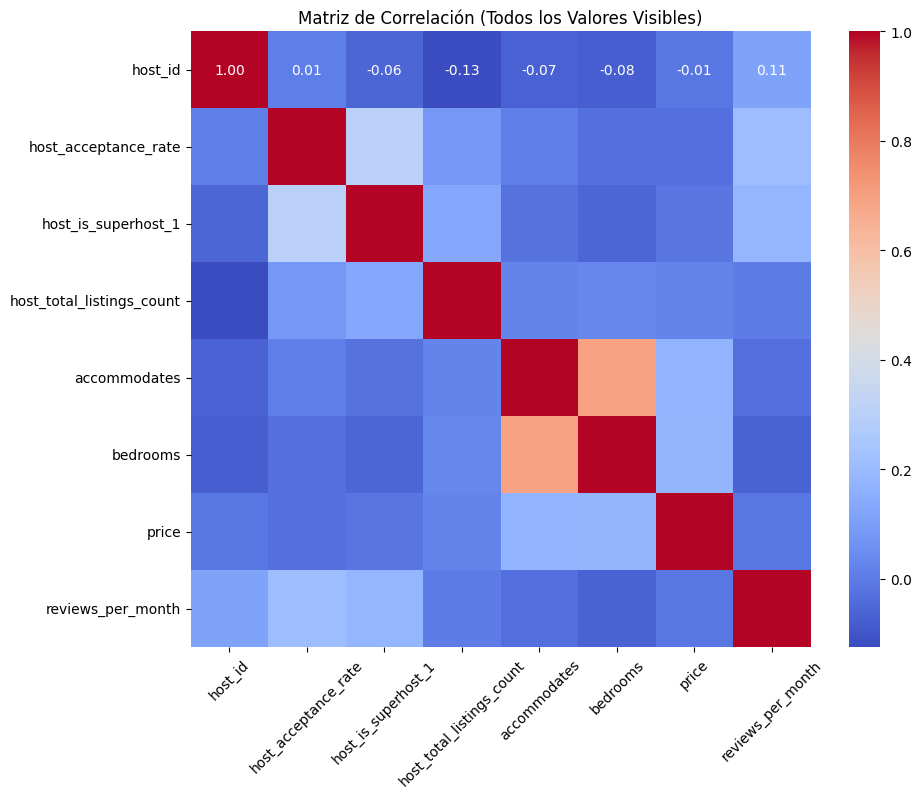

In [50]:
# Calcular la matriz de correlación
correlacion = df_2.corr().fillna(0)  

plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, annot_kws={"size": 10})
plt.title("Matriz de Correlación (Todos los Valores Visibles)")
plt.xticks(rotation=45)  # Rotar etiquetas para que no se sobrepongan
plt.yticks(rotation=0)
plt.show()



In [51]:
print(df_2.dtypes)

host_id                        int64
host_acceptance_rate         float64
host_is_superhost_1             bool
host_total_listings_count    float64
accommodates                 float64
bedrooms                     float64
price                        float64
reviews_per_month            float64
dtype: object


In [52]:
correlacion = df_2.corr().fillna(0)
print(correlacion)

                            host_id  host_acceptance_rate  \
host_id                    1.000000              0.007088   
host_acceptance_rate       0.007088              1.000000   
host_is_superhost_1       -0.057256              0.303609   
host_total_listings_count -0.125297              0.077589   
accommodates              -0.068590              0.007718   
bedrooms                  -0.077564             -0.029607   
price                     -0.012033             -0.032201   
reviews_per_month          0.112519              0.207527   

                           host_is_superhost_1  host_total_listings_count  \
host_id                              -0.057256                  -0.125297   
host_acceptance_rate                  0.303609                   0.077589   
host_is_superhost_1                   1.000000                   0.128610   
host_total_listings_count             0.128610                   1.000000   
accommodates                         -0.028410                   

<Axes: xlabel='host_acceptance_rate', ylabel='host_id'>

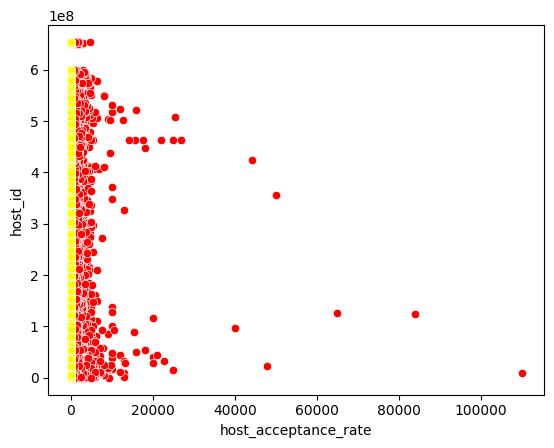

In [55]:
sns.scatterplot(x='host_acceptance_rate', y='host_id', color="blue", data=df)
sns.scatterplot(x='price', y='host_id', color="red", data=df)
sns.scatterplot(x='accommodates', y='host_id', color="yellow", data=df)

In [ ]:
Vars_Indep= df[['host_acceptance_rate', 'price','accommodates']]
Var_Dep= df['host_id']

In [58]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [60]:
type(model)


sklearn.linear_model._base.LinearRegression

In [62]:
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [63]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'price', 'accommodates'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 4.36151306e+06,  1.01122918e+01, -8.92585701e+06]),
 'rank_': 3,
 'singular_': array([2.26866873e+05, 1.42160396e+02, 3.27696580e+01]),
 'intercept_': 205922153.20743316}

In [64]:
model.score(Vars_Indep,Var_Dep)

0.004762636975219503

In [65]:
y_pred= model.predict(X=df_2[['host_acceptance_rate', 'price', 'accommodates']])
y_pred

array([1.56728524e+08, 1.83540477e+08, 1.91173039e+08, ...,
       1.90260297e+08, 1.90259286e+08, 1.81333934e+08])

In [75]:
print(model.coef_, model.intercept_)


[ 4.36151306e+06  1.01122918e+01 -8.92585701e+06] 205922153.20743316


In [ ]:
df_2.insert(0, 'y_pred', y_pred)
df_2

,y_pred,Predicciones,host_id,host_acceptance_rate,host_is_superhost_1,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,1.567285e+08,1.567285e+08,18365661,1.00,False,2.0,6.0,3.0,0.0,0.53
1,1.835405e+08,1.835405e+08,187463,1.00,False,2.0,3.0,2.0,3400.0,0.40
2,1.911730e+08,1.911730e+08,368229,0.71,False,1.0,2.0,1.0,586.0,0.34
3,1.744058e+08,1.744058e+08,250159,0.96,True,3.0,4.0,2.0,0.0,0.50
4,1.922575e+08,1.922575e+08,250159,0.96,True,3.0,2.0,0.0,0.0,1.46
...,...,...,...,...,...,...,...,...,...,...
10447,1.724077e+08,1.724077e+08,651739362,0.50,False,2.0,4.0,1.0,810.0,1.00
10448,1.902587e+08,1.902587e+08,22317220,0.50,False,2.0,2.0,1.0,738.0,1.00
10449,1.902603e+08,1.902603e+08,654104400,0.50,False,1.0,2.0,1.0,900.0,1.00
10450,1.902593e+08,1.902593e+08,36599348,0.50,False,1.0,2.0,1.0,800.0,1.00


<Axes: xlabel='price', ylabel='host_id'>

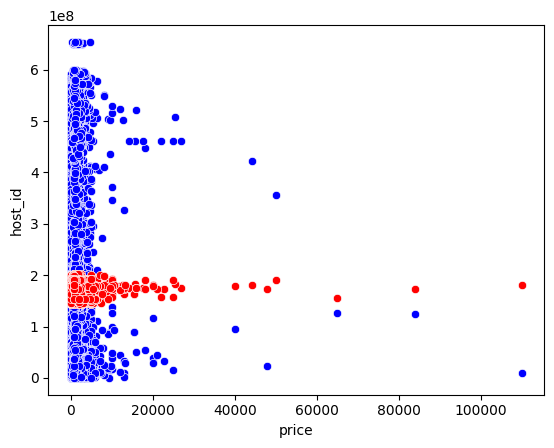

In [78]:
sns.scatterplot(x='price', y='host_id', color="blue", data=df_2)
sns.scatterplot(x='price', y='y_pred', color="red", data=df_2)

In [79]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.004762636975219503

In [80]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06901186111980681

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

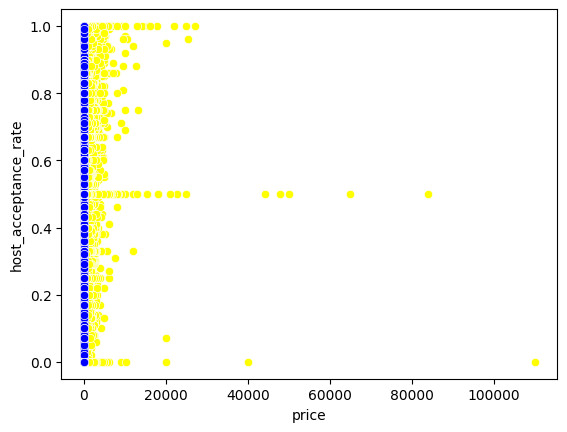

In [86]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="yellow", data=df_2)

sns.scatterplot(x='accommodates', y='host_acceptance_rate', color="red", data=df_2)
sns.scatterplot(x='host_total_listings_count', y='host_acceptance_rate', color="blue", data=df_2)


In [105]:
Vars_Indep= df[['host_total_listings_count', 'reviews_per_month','accommodates']]
Var_Dep= df['host_acceptance_rate']

In [106]:
model= LinearRegression()

In [107]:
type(model)

sklearn.linear_model._base.LinearRegression

In [108]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [109]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count', 'reviews_per_month', 'accommodates'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.0398933 , 0.08050166, 0.0029742 ]),
 'rank_': 3,
 'singular_': array([144.3958049 ,  84.60504683,  63.37562472]),
 'intercept_': 0.4923849676531984}

In [110]:
model.score(Vars_Indep,Var_Dep)

0.04922724926448241

In [116]:
y_pred3= model.predict(X=df_2[['host_total_listings_count', 'reviews_per_month', 'accommodates']])
y_pred3

array([0.63268265, 0.61329483, 0.56559723, ..., 0.61872833, 0.61872833,
       0.62170253])

In [117]:
print(model.coef_, model.intercept_)

[0.0398933  0.08050166 0.0029742 ] 0.4923849676531984


In [118]:
df_2.insert(0, 'y_pred3', y_pred3)
df_2

,y_pred3,y_pred2,y_pred,Predicciones,host_id,host_acceptance_rate,host_is_superhost_1,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,0.632683,0.676445,1.567285e+08,1.567285e+08,18365661,1.00,False,2.0,6.0,3.0,0.0,0.53
1,0.613295,0.650228,1.835405e+08,1.835405e+08,187463,1.00,False,2.0,3.0,2.0,3400.0,0.40
2,0.565597,0.621667,1.911730e+08,1.911730e+08,368229,0.71,False,1.0,2.0,1.0,586.0,0.34
3,0.664212,0.711225,1.744058e+08,1.744058e+08,250159,0.96,True,3.0,4.0,2.0,0.0,0.50
4,0.735546,0.705579,1.922575e+08,1.922575e+08,250159,0.96,True,3.0,2.0,0.0,0.0,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...
10447,0.664570,0.666571,1.724077e+08,1.724077e+08,651739362,0.50,False,2.0,4.0,1.0,810.0,1.00
10448,0.658622,0.661300,1.902587e+08,1.902587e+08,22317220,0.50,False,2.0,2.0,1.0,738.0,1.00
10449,0.618728,0.620028,1.902603e+08,1.902603e+08,654104400,0.50,False,1.0,2.0,1.0,900.0,1.00
10450,0.618728,0.620550,1.902593e+08,1.902593e+08,36599348,0.50,False,1.0,2.0,1.0,800.0,1.00


<Axes: xlabel='price', ylabel='host_total_listings_count'>

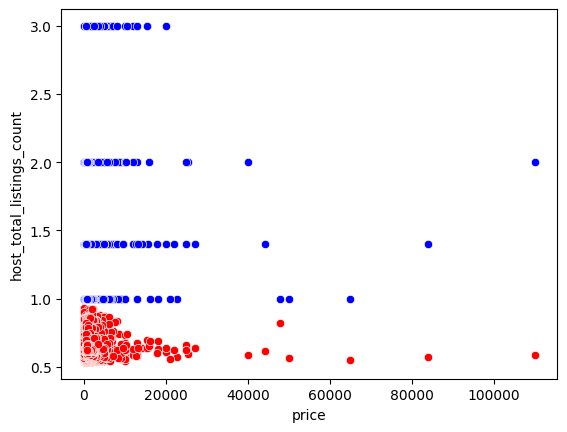

In [119]:
sns.scatterplot(x='price', y='host_total_listings_count', color="blue", data=df_2)
sns.scatterplot(x='price', y='y_pred3', color="red", data=df_2)

In [120]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04922724926448241

In [121]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2218721462114666

<Axes: xlabel='accommodates', ylabel='price'>

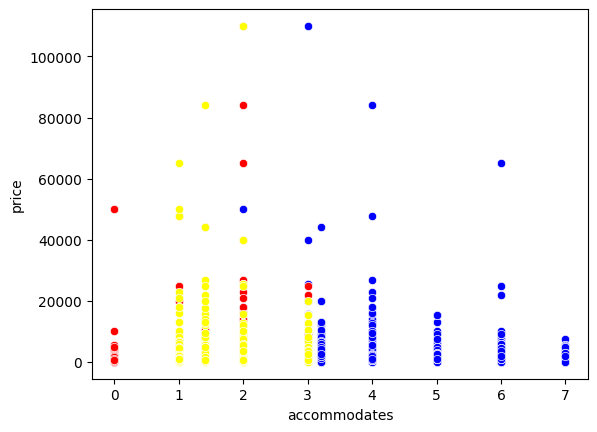

In [124]:
sns.scatterplot(x='accommodates', y='price', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='price', color="red", data=df)
sns.scatterplot(x='host_total_listings_count', y='price', color="yellow", data=df)

In [125]:
Vars_Indep= df[['host_total_listings_count', 'bedrooms','accommodates']]
Var_Dep= df['price']

In [126]:
model= LinearRegression()

In [127]:
type(model)

sklearn.linear_model._base.LinearRegression

In [128]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [129]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count', 'bedrooms', 'accommodates'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 62.04496635, 326.78255829, 152.06532784]),
 'rank_': 3,
 'singular_': array([155.08582315,  63.39317718,  51.17552099]),
 'intercept_': 271.6942394053581}

In [130]:
model.score(Vars_Indep,Var_Dep)

0.036719083853689605

In [132]:
y_pred4= model.predict(X=df_2[['host_total_listings_count', 'bedrooms','accommodates']])
y_pred4

array([2288.523814  , 1505.5452722 ,  964.65241972, ...,  964.65241972,
        964.65241972, 1116.71774756])

In [134]:
print(model.coef_, model.intercept_)

[ 62.04496635 326.78255829 152.06532784] 271.6942394053581


In [135]:
df_2.insert(0, 'y_pred4', y_pred4)
df_2

,y_pred4,y_pred3,y_pred2,y_pred,Predicciones,host_id,host_acceptance_rate,host_is_superhost_1,host_total_listings_count,accommodates,bedrooms,price,reviews_per_month
0,2288.523814,0.632683,0.676445,1.567285e+08,1.567285e+08,18365661,1.00,False,2.0,6.0,3.0,0.0,0.53
1,1505.545272,0.613295,0.650228,1.835405e+08,1.835405e+08,187463,1.00,False,2.0,3.0,2.0,3400.0,0.40
2,964.652420,0.565597,0.621667,1.911730e+08,1.911730e+08,368229,0.71,False,1.0,2.0,1.0,586.0,0.34
3,1719.655566,0.664212,0.711225,1.744058e+08,1.744058e+08,250159,0.96,True,3.0,4.0,2.0,0.0,0.50
4,761.959794,0.735546,0.705579,1.922575e+08,1.922575e+08,250159,0.96,True,3.0,2.0,0.0,0.0,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,1330.828042,0.664570,0.666571,1.724077e+08,1.724077e+08,651739362,0.50,False,2.0,4.0,1.0,810.0,1.00
10448,1026.697386,0.658622,0.661300,1.902587e+08,1.902587e+08,22317220,0.50,False,2.0,2.0,1.0,738.0,1.00
10449,964.652420,0.618728,0.620028,1.902603e+08,1.902603e+08,654104400,0.50,False,1.0,2.0,1.0,900.0,1.00
10450,964.652420,0.618728,0.620550,1.902593e+08,1.902593e+08,36599348,0.50,False,1.0,2.0,1.0,800.0,1.00


<Axes: xlabel='bedrooms', ylabel='price'>

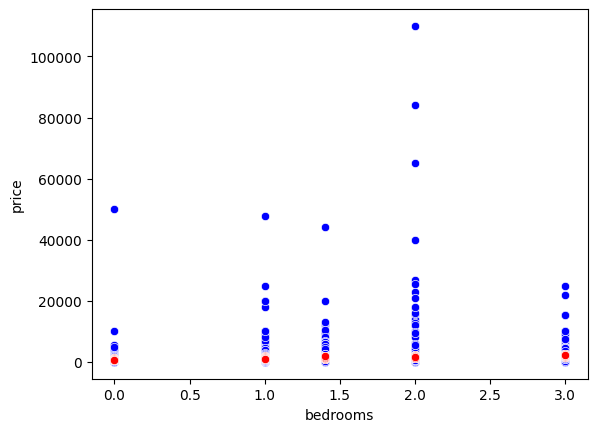

In [136]:
sns.scatterplot(x='bedrooms', y='price', color="blue", data=df_2)
sns.scatterplot(x='bedrooms', y='y_pred4', color="red", data=df_2)

In [137]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.036719083853689605

In [138]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.19162224258600463